<a href="https://colab.research.google.com/github/Navya-89/KNN_Hierarchial_clustering_real_time_data_/blob/main/Task1_FDA_Project_Group78.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

In [ ]:
# To import all the datasets required
from google.colab import files
uploaded = files.upload()

Saving Data4.csv to Data4.csv


In [ ]:
# All the modules needed are imported as below 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

Equations of the Evaluation metrics used in this task - 

Accuracy =  (TP + TN) / (P+N), where P and N are total positive and negative classes.

F1 Score = 2 x ((Precision*Recall) / (Precision + Recall))

## Data 1

In [ ]:
# Data 1 
df_1 = pd.read_csv('Data1.csv')
df_1 = df_1.drop(columns='Unnamed: 0', index = 1)
df_1.head(2)

,Unnamed: 0,X1,X2,X3,Class
0,1,-0.063274,0.027734,0.022683,1
1,2,-0.000731,0.048211,0.069198,1


In [ ]:
# Splitting the data based on their class to visualize the data
data1, data2, data3, data4, data5, data6, data7 = df_1[df_1['Class']==1], df_1[df_1['Class'] == 2], df_1[df_1['Class']== 3], df_1[df_1['Class']== 4], df_1[df_1['Class']== 5], df_1[df_1['Class']== 6], df_1[df_1['Class']== 7]
data = [data1, data2, data3, data4, data5, data6, data7]

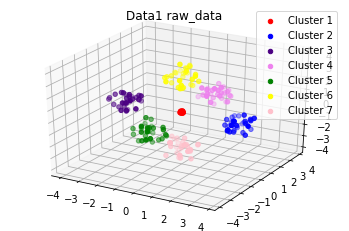

In [ ]:
# Visualizing the raw data 
def plot_graph_df1(data,name):

  dplot = plt.axes(projection='3d')
  xline = np.linspace(-3, 3, 1000)
  yline = np.linspace(-3, 3, 1000)
  zline = np.linspace(-3, 3, 1000)

  dplot.scatter3D(data[0].X1, data[0].X2, data[0].X3, c='red', label = 'Cluster 1')
  dplot.scatter3D(data[1].X1, data[1].X2, data[1].X3, c='blue', label = 'Cluster 2')
  dplot.scatter3D(data[2].X1, data[2].X2, data[2].X3, c='indigo', label = 'Cluster 3')
  dplot.scatter3D(data[3].X1, data[3].X2, data[3].X3, c='violet', label = 'Cluster 4')
  dplot.scatter3D(data[4].X1, data[4].X2, data[4].X3, c='green', label = 'Cluster 5')
  dplot.scatter3D(data[5].X1, data[5].X2, data[5].X3, c='yellow', label = 'Cluster 6')
  dplot.scatter3D(data[6].X1, data[6].X2, data[6].X3, c='pink', label = 'Cluster 7')

  plt.legend()
  plt.title("Data1"+ name)
  return plt.show()

plot_graph_df1(data, " raw_data")


In [ ]:
# To predict the data clusters using KMeans 
km = KMeans(n_clusters=7, max_iter=100, random_state= 0)
km.fit(df_1.iloc[:,:3])]
y_pred = (km.labels_)+1

KMeans(max_iter=100, n_clusters=7, random_state=0)

In [ ]:
# Calculating the accuracy and f1 score accordingly
print("Accuracy for KMeans: ",accuracy_score(df_1.iloc[:,3].values,y_pred))
print("F1 Score for KMeans: ",f1_score(df_1.iloc[:,3].values,y_pred, average = 'macro'))

Since Kmeans clustering algorithm clusters the data and labels them accordigly. This order of labeling maynot be similar to the class labels of the raw data.
So the accuracy reported is not appropriate

In [ ]:
# Mapping the predicted labels to Class labels to check accuracy. 
dic = {4: 1, 6:2, 5:3, 3:4, 7:5, 1:6, 2:7}
y_pred = np.vectorize(dic.__getitem__)(y_pred)
print("Accuracy for KMeans after mapping: ",accuracy_score(df_1.iloc[:,3].values,y_pred))
print("F1 Score for KMeans after mapping: ",f1_score(df_1.iloc[:,3].values,y_pred, average = 'macro'))

As the mapping cannot be done accurately. The reported evaluation metrics are not a right measure to calculate the algorithm efficiency.

In [ ]:
# Visualizing the plot according to KMeans algorithm prediction
df_1['Prediction_KM'] = y_pred 
data1, data2, data3, data4, data5, data6, data7 = df_1[df_1['Prediction_KM'] ==1], df_1[df_1['Prediction_KM'] == 2], df_1[df_1['Prediction_KM']== 3], df_1[df_1['Prediction_KM']== 4], df_1[df_1['Prediction_KM']== 5], df_1[df_1['Prediction_KM']== 6], df_1[df_1['Prediction_KM']== 7]
clustering_predict = [data1, data2, data3, data4, data5, data6, data7]
plot_graph_df1(clustering_predict, " KMeans_prediction")

Hierarchial clustering

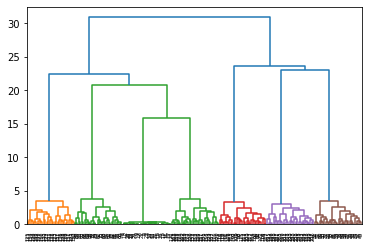

<Figure size 1800x720 with 0 Axes>

In [ ]:
# Plotting dendogram
linkage_data = linkage(df_1.iloc[:,:3], method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.axhline(y = 28, color = 'r', linestyle = '--')
fig = plt.figure(figsize=(25, 10))
plt.show()

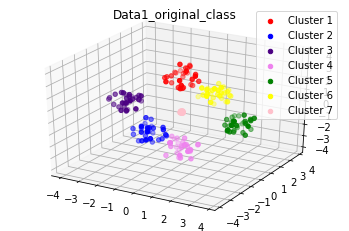

In [ ]:
# Clustering based on hierarchial algorithm 
hierarchical_cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(df_1.iloc[:,:3])
y_pred_hc = labels+1
df_1['Prediction_HC'] = y_pred_hc
data1, data2, data3, data4, data5, data6, data7 = df_1[df_1['Prediction_HC'] ==1], df_1[df_1['Prediction_HC'] == 2], df_1[df_1['Prediction_HC']== 3], df_1[df_1['Prediction_HC']== 4], df_1[df_1['Prediction_HC']== 5], df_1[df_1['Prediction_HC']== 6], df_1[df_1['Prediction_HC']== 7]
clustering_predict = [data1, data2, data3, data4, data5, data6, data7]
plot_graph_df1(clustering_predict, " HC_prediction")

In [ ]:
# Evaluation metrics
print("Accuracy for Hierarchical Clustering: ", accuracy_score(df_1.iloc[:,3].values,y_pred))
print("F1 Score for Hierarchical Clustering: ", f1_score(df_1.iloc[:,3].values,y_pred, average = 'macro'))

Saving Data4.csv to Data4.csv


## Data 2

In [ ]:
# Data 2 
df_2 = pd.read_csv('Data2.csv')
df_2 = df_2.drop(columns='Unnamed: 0', index = 1)
df_2.head(4)

,X,Y,C,Class
0,3.277701,0.814082,0.326574,1
2,0.268546,0.582963,0.080981,1
3,2.031145,0.244597,0.643921,1
4,0.188677,0.461280,0.496633,1


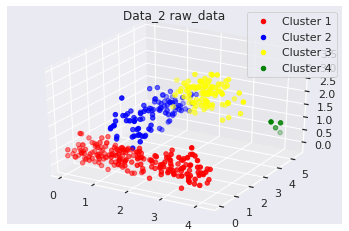

In [ ]:
# Visualizing the raw data 
data1, data2, data3, data4 = df_2[df_2['Class']==1], df_2[df_2['Class'] == 2], df_2[df_2['Class'] == 3], df_2[df_2['Class'] == 4]
data_2 = [data1, data2, data3, data4]
def plot_graph_df2(data,name):
  dplot = plt.axes(projection='3d')
  xline = np.linspace(0, 5, 1000)
  yline = np.linspace(0, 5, 1000)
  zline = np.linspace(0, 5, 1000)
  dplot.scatter3D(data[0].X, data[0].Y, data[0].C, c='red', label = 'Cluster 1')
  dplot.scatter3D(data[1].X, data[1].Y, data[1].C, c='blue', label = 'Cluster 2')
  dplot.scatter3D(data[2].X, data[2].Y, data[2].C, c='yellow', label = 'Cluster 3')
  dplot.scatter3D(data[3].X, data[3].Y, data[3].C, c='green', label = 'Cluster 4')
  plt.title('Data_2'+ name)
  plt.legend()
  return plt.show()

plot_graph_df2(data_2, " raw_data")

In [ ]:
# To predict the data clusters using KMeans 
km = KMeans(n_clusters=4, max_iter=100, random_state= 0)
km.fit(df_2.iloc[:,:3])
y_pred = (km.labels_)+1

In [ ]:
# Calculating the accuracy and f1 score accordingly
print("Accuracy for KMeans: ",accuracy_score(df_2.iloc[:,3].values,y_pred))
print("F1 Score for KMeans: ", f1_score(df_2.iloc[:,3].values,y_pred, average = 'macro'))

0.21588089330024815
0.17097264437689969


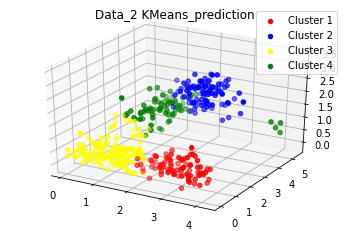

In [ ]:
# Visualizing the plot according to KMeans algorithm prediction
df_2['Prediction_KM'] = y_pred 
data1, data2, data3, data4 = df_2[df_2['Prediction_KM'] ==1], df_2[df_2['Prediction_KM'] == 2], df_2[df_2['Prediction_KM']== 3], df_2[df_2['Prediction_KM']== 4] 
clustering_predict = [data1, data2, data3, data4,]
plot_graph_df2(clustering_predict, " KMeans_prediction")

In [ ]:
# To improve the accuracy number of clusters is reduced
km = KMeans(n_clusters=3, max_iter=100, random_state= 0)
km.fit(df_2.iloc[:,:3])
y_pred = (km.labels_)+1

In [ ]:
# Evaluation metrics
print("Accuracy for reduced clusters in KMeans: ",accuracy_score(df_2.iloc[:,3].values,y_pred))
print("F1 score for reduced clusters in KMeans: ", f1_score(df_2.iloc[:,3].values,y_pred, average = 'macro'))

0.9379652605459057
0.7033171615999583


It is observed that accuracy increases when 3 clusters are considered. But Kmeans clustering algorithm clusters the data and labels them accordigly, This order of labeling maynot be similar to the class labels of the raw data.
So the accuracy reported is not appropriate

Hierarchical Clustering 

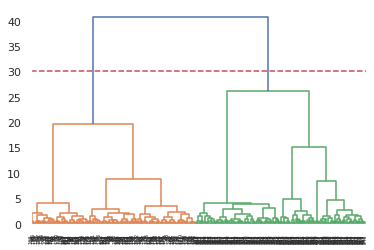

<Figure size 1800x720 with 0 Axes>

In [ ]:
# Plotting dendogram
linkage_data = linkage(df_2.iloc[:,:3], method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.axhline(y = 30, color = 'r', linestyle = '--')
fig = plt.figure(figsize=(25, 10))
plt.show()

In [ ]:
# Clustering based on hierarchial algorithm 
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(df_2.iloc[:,:3])
y_pred_hc = labels+1
df_2['Prediction_HC'] = y_pred_hc
data1, data2, data3, data4 = df_2[df_2['Prediction_HC'] ==1], df_2[df_2['Prediction_HC'] == 2], df_2[df_2['Prediction_HC']== 3], df_2[df_2['Prediction_HC']== 4]
clustering_predict = [data1, data2, data3, data4]
plot_graph_df2(clustering_predict, " HC_prediction")

In [ ]:
# Evaluation metrics
print("Accuracy for Hierarchical Clustering: ", accuracy_score(df_1.iloc[:,3].values,y_pred))
print("F1 Score for Hierarchical Clustering: ", f1_score(df_1.iloc[:,3].values,y_pred, average = 'macro'))

## Data 3

In [ ]:
data3 = pd.read_csv('Data3.csv')
df3 = data3.drop(['Unnamed: 0'],axis=1)

In [ ]:
from scipy.spatial.distance import pdist
hist = pdist(df3.iloc[:,0:3])
#hist
hist.shape

In [ ]:
import seaborn as sns
sns.histplot(hist)

In [ ]:
#evaluating within the cluster
from sklearn.cluster import KMeans
d3kmeans = KMeans(n_clusters=4)
d3kmeans.fit(df3.iloc[:,0:3])
pred = d3kmeans.predict(df3.iloc[:,0:3])
pred

### Hierarchical Cluster

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_clusterd3 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hierarchical_labels = hierarchical_clusterd3.fit_predict(df3)
hierarchical_labels

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy

plt.figure(figsize=(15,10))

linkage_data = linkage(df3, method='ward', metric='euclidean')
dendrogram(linkage_data)
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
plt.axhline(y = 35, color = 'r', linestyle = '--')
plt.show()

In [ ]:
#creating new columns of predicited values using kmeans and hierarchial
df3['kcluster'] = pred                        
df3['kcluster'] = df3['kcluster'] +1
df3['hcluster'] = hierarchical_labels                       
df3['hcluster'] = df3['hcluster'] +1    

In [ ]:
#grouping according to the given and predicted values
df_kmeans = df3.groupby(['Class','kcluster'],as_index=False)['X1'].count().rename(columns={'X1':'counts'})  
df_hier = df3.groupby(['Class','hcluster'],as_index=False)['X1'].count().rename(columns={'X1':'counts'})  

In [ ]:
df_kmeans

In [ ]:
df_hier

### Contingency table


In [ ]:
TP_K,FP_K,FN_K,TN_K=0,0,0,0                              
for i in df_kmeans['Class'].unique(): 
  tmp = df_kmeans[df_kmeans.Class==i]
  tmp1 = tmp.sort_values(by=['counts'],ascending=[False])
  T, P = tmp1.iloc[0,0], tmp1.iloc[0,1]      
  TP_K = TP_K+df_kmeans[(df_kmeans.Class==T) & (df_kmeans.kcluster==P)].iloc[0,2] if df_kmeans[(df_kmeans.Class==T) & (df_kmeans.kcluster==P)].shape[0]!=0 else TP_K+0
  FP_K = FP_K+df_kmeans[(df_kmeans.Class==T) & (df_kmeans.kcluster!=P)].iloc[0,2] if df_kmeans[(df_kmeans.Class==T) & (df_kmeans.kcluster!=P)].shape[0]!=0 else FP_K+0
  FN_K = FN_K+df_kmeans[(df_kmeans.Class!=T) & (df_kmeans.kcluster==P)].iloc[0,2] if df_kmeans[(df_kmeans.Class!=T) & (df_kmeans.kcluster==P)].shape[0]!=0 else FN_K+0
  TN_K = TN_K+df_kmeans[(df_kmeans.Class!=T) & (df_kmeans.kcluster!=P)].iloc[0,2] if df_kmeans[(df_kmeans.Class!=T) & (df_kmeans.kcluster!=P)].shape[0]!=0 else TN_K+0  

In [ ]:
TP_H,FP_H,FN_H,TN_H=0,0,0,0                              
for i in df_hier['Class'].unique():                
  tmp = df_hier[df_hier.Class==i]                    
  tmp1 = tmp.sort_values(by=['counts'],ascending=[False])      
  T, P = tmp1.iloc[0,0], tmp1.iloc[0,1]                         
  TP_H = TP_H+df_hier[(df_hier.Class==T) & (df_hier.hcluster==P)].iloc[0,2] if df_hier[(df_hier.Class==T) & (df_hier.hcluster==P)].shape[0]!=0 else TP_H+0
  FP_H = FP_H+df_hier[(df_hier.Class==T) & (df_hier.hcluster!=P)].iloc[0,2] if df_hier[(df_hier.Class==T) & (df_hier.hcluster!=P)].shape[0]!=0 else FP_H+0
  FN_H = FN_H+df_hier[(df_hier.Class!=T) & (df_hier.hcluster==P)].iloc[0,2] if df_hier[(df_hier.Class!=T) & (df_hier.hcluster==P)].shape[0]!=0 else FN_H+0
  TN_H = TN_H+df_hier[(df_hier.Class!=T) & (df_hier.hcluster!=P)].iloc[0,2] if df_hier[(df_hier.Class!=T) & (df_hier.hcluster!=P)].shape[0]!=0 else TN_H+0

In [ ]:
print("Accuracy Score using Kmeans = " ,(TP_K+TN_K)/(TP_K+FP_K+FN_K+TN_K))

Though the accuracy score is 1, we cannot be confident with it as mapping classes could be false because they are done based on random mapping. This model therefore cannot be considered.

In [ ]:
Precision_K = TP_K/(TP_K+FP_K)  
Recall_K = TP_K/(TP_K+FN_K) 
F1_Kmeans = 2 * (Precision_K * Recall_K) / (Precision_K + Recall_K)
print("Precision using Kmeans = " ,Precision_K)
print("Recall using Kmeans = " ,Recall_K)
print("F1 Score using Kmeans = " ,F1_Kmeans)     

In [ ]:
print("Accuracy Score using Hierarchial = " ,(TP_H+TN_H)/(TP_H+FP_H+FN_H+TN_H)) 

In [ ]:
Precision_H = TP_H/(TP_H+FP_H)  
Recall_H = TP_H/(TP_H+FN_H)
F1_Hier = 2 * (Precision_H * Recall_H) / (Precision_H + Recall_H) 
print("Precision using Kmeans = " ,Precision_K)
print("Recall using Kmeans = " ,Recall_K)
print("F1 Score using Hierarchial = " ,F1_Hier)

3D graph for data points according to original class


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.cluster import KMeans
kplot=plt.axes(projection='3d')                                                                                                                                    
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())                                      
kplot.scatter3D(df3.X1,df3.X2,df3.X3,label = 'Original Clusters for the data points' ,marker='o',cmap=cmap,c=df3.Class)    
plt.xlabel('X1')
plt.ylabel('X2')
kplot.set_zlabel('X3')

3D graph for data points according to KMeans predicted class

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.cluster import KMeans
kplot=plt.axes(projection='3d')
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())                                   
kplot.scatter3D(df3.X1,df3.X2,df3.X3,label = 'Kmeans Predicted Clusters for the data points',marker='o',cmap=cmap,c=df3.kcluster)    
plt.xlabel('X1')
plt.ylabel('X2')
kplot.set_zlabel('X3')

3D graph for data points according to Hierarchial predicted class

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.cluster import KMeans
kplot=plt.axes(projection='3d')
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())                                   
kplot.scatter3D(df3.X1,df3.X2,df3.X3,label = 'Hierarchial Predicted Clusters for the data points',marker='o',cmap=cmap,c=df3.hcluster)    
plt.xlabel('X1')
plt.ylabel('X2')
kplot.set_zlabel('X3')

## Data 4

In [ ]:
# Data 4
df_4 = pd.read_csv('Data4.csv')
df_4 = df_4.drop(columns='Unnamed: 0', index = 1)

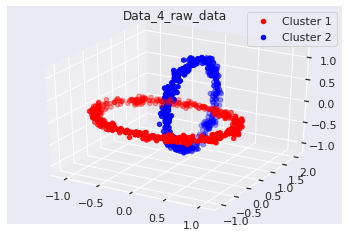

In [ ]:
# Visualizing the raw data 
data1, data2 = df_4[df_4['Class']==1], df_4[df_4['Class'] == 2]
data_4 = [data1, data2]
def plot_graph_df4(data,name):
  kplot = plt.axes(projection='3d')
  xline = np.linspace(-1, 2, 1000)
  yline = np.linspace(-1, 2, 1000)
  zline = np.linspace(-1, 2, 1000)
  kplot.scatter3D(data[0].X1, data[0].X2, data[0].X3, c='red', label = 'Cluster 1')
  kplot.scatter3D(data[1].X1, data[1].X2, data[1].X3, c='blue', label = 'Cluster 2')
  plt.title('Data_4'+ name)
  plt.legend()
  return plt.show()

plot_graph_df4(data_4, "_raw_data")

In [ ]:
# To predict the data clusters using KMeans 
km = KMeans(n_clusters=2, max_iter=100, random_state= 0)
km.fit(df_4.iloc[:,:3])
y_pred = (km.labels_)+1

In [ ]:
# Calculating the accuracy and f1 score accordingly
print("Accuracy Score for KMeans: ",accuracy_score(df_4.iloc[:,3].values,y_pred))
print("F1 Score for KMeans: ",f1_score(df_4.iloc[:,3].values,y_pred, average = 'macro'))

Accuracy Score for KMeans:  0.34734734734734735
F1 Score for KMeans:  0.34734669338677354


In [ ]:
# Mapping the labels and reevaluating the accuracy
dic = {1:2, 2:1}
y_pred = np.vectorize(dic.__getitem__)(y_pred)
df_4['Prediction_KM'] = y_pred
print("Accuracy Score after mapping for KMeans: ",accuracy_score(df_4.iloc[:,3].values,y_pred))
print("F1 Score after mapping for KMeans: ",f1_score(df_4.iloc[:,3].values,y_pred, average = 'macro'))

Accuracy Score after mapping for KMeans:  0.6526526526526526
F1 Score after mapping for KMeans:  0.6526526526526526


Since Kmeans clustering algorithm clusters the data and labels them accordigly. This order of labeling maynot be similar to the class labels of the raw data.
So the accuracy reported is not appropriate

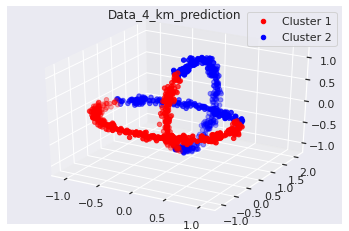

In [ ]:
# Visualizing the plot according to KMeans algorithm prediction
data1, data2 = df_4[df_4['Prediction_KM']==1], df_4[df_4['Prediction_KM'] == 2]
data_4 = [data1, data2]
plot_graph_df4(data_4, "_km_prediction")

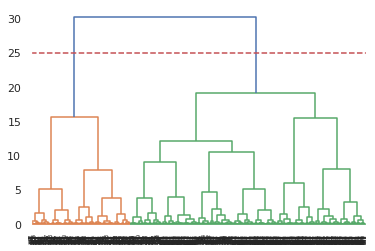

<Figure size 1800x720 with 0 Axes>

In [ ]:
# Plotting dendogram
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_data = linkage(df_4.iloc[:,:3], method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.axhline(y = 25, color = 'r', linestyle = '--')
fig = plt.figure(figsize=(25, 10))
plt.show()

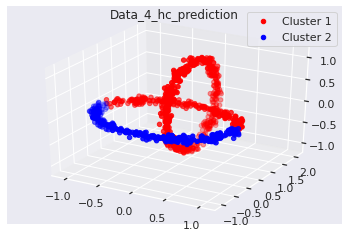

In [ ]:
# Clustering based on hierarchial algorithm 
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(df_4.iloc[:,:3])
y_pred_hc = labels+1
df_4['Prediction_HC'] = y_pred_hc
data1, data2 = df_4[df_4['Prediction_HC']==1], df_4[df_4['Prediction_HC'] == 2]
data_4h = [data1, data2]
plot_graph_df4(data_4h, "_hc_prediction")


In [ ]:
# Evaluation metrics
print("Accuracy for Hierarchical Clustering: ",accuracy_score(df_4.iloc[:,3].values,y_pred_hc))
print("F1score for Hierarchical Clustering: ",f1_score(df_4.iloc[:,3].values,y_pred_hc, average = 'macro'))

Accuracy for Hierarchical Clustering:  0.34734734734734735
F1score for Hierarchical Clustering:  0.34734669338677354


## Data 5

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data5.csv to Data5.csv


In [ ]:
import pandas as pd
data5 = pd.read_csv('Data5.csv')
df5 = data5.drop(['Unnamed: 0'],axis=1)
df5

,X1,X2,X3,Class
0,-4.822490,-50.402170,4.020861,1
1,-44.460120,20.964670,-11.492060,1
2,50.001020,0.780748,9.134460,1
3,-41.699080,-22.310060,16.314120,1
4,4.425242,-4.666664,50.223740,1
...,...,...,...,...
795,-1.531027,0.681636,0.543271,2
796,0.500754,-1.848209,0.605654,2
797,1.089574,-0.246493,-3.355758,2
798,-1.907717,4.964502,2.098423,2


In [ ]:
from scipy.spatial.distance import pdist
hist = pdist(df5.iloc[:,0:3])
#hist
hist.shape

(319600,)

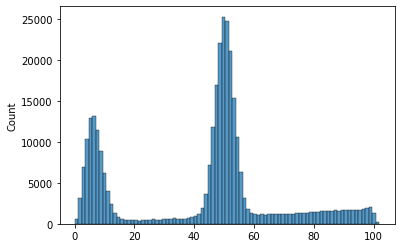

In [ ]:
import seaborn as sns
sns.histplot(hist) 

Kmeans


In [ ]:
#evaluating within the cluster
from sklearn.cluster import KMeans
d5kmeans = KMeans(n_clusters=2)
d5kmeans.fit(df3.iloc[:,0:3])
pred = d5kmeans.predict(df5.iloc[:,0:3])
pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,

Hierarchial Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_clusterd5 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hierarchical_labels = hierarchical_clusterd5.fit_predict(df5)
hierarchical_labels

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,

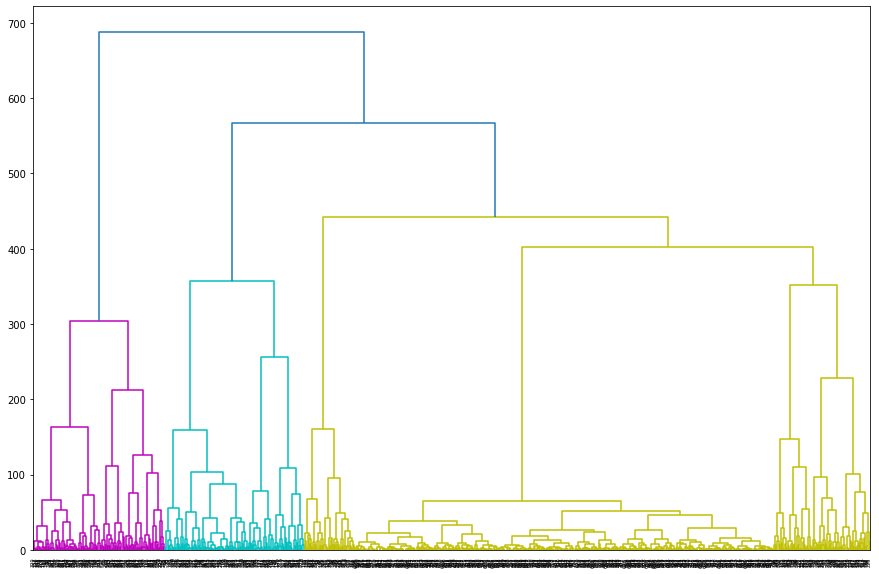

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy

plt.figure(figsize=(15,10))

linkage_data = linkage(df5, method='ward', metric='euclidean')
dendrogram(linkage_data)
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
plt.show()

In [ ]:
#creating new columns of predicited values using kmeans and hierarchial
df5['kcluster'] = pred                        
df5['kcluster'] = df5['kcluster'] +1
df5['hcluster'] = hierarchical_labels                       
df5['hcluster'] = df5['hcluster'] +1    
df5


,X1,X2,X3,Class,kcluster,hcluster
0,-4.822490,-50.402170,4.020861,1,2,2
1,-44.460120,20.964670,-11.492060,1,1,1
2,50.001020,0.780748,9.134460,1,2,1
3,-41.699080,-22.310060,16.314120,1,1,1
4,4.425242,-4.666664,50.223740,1,1,1
...,...,...,...,...,...,...
795,-1.531027,0.681636,0.543271,2,1,1
796,0.500754,-1.848209,0.605654,2,2,1
797,1.089574,-0.246493,-3.355758,2,2,1
798,-1.907717,4.964502,2.098423,2,1,1


In [ ]:
#grouping according to the given and predicted values
df_kmeans = df5.groupby(['Class','kcluster'],as_index=False)['X1'].count().rename(columns={'X1':'counts'})  
df_hier = df5.groupby(['Class','hcluster'],as_index=False)['X1'].count().rename(columns={'X1':'counts'})  

In [ ]:
df_kmeans

,Class,kcluster,counts
0,1,1,205
1,1,2,195
2,2,1,204
3,2,2,196


In [ ]:
df_hier

,Class,hcluster,counts
0,1,1,274
1,1,2,126
2,2,1,400


Contingency table

In [ ]:
TP_K,FP_K,FN_K,TN_K=0,0,0,0                              
for i in df_kmeans['Class'].unique(): 
  tmp = df_kmeans[df_kmeans.Class==i]
  tmp1 = tmp.sort_values(by=['counts'],ascending=[False])
  T, P = tmp1.iloc[0,0], tmp1.iloc[0,1]      
  TP_K = TP_K+df_kmeans[(df_kmeans.Class==T) & (df_kmeans.kcluster==P)].iloc[0,2] if df_kmeans[(df_kmeans.Class==T) & (df_kmeans.kcluster==P)].shape[0]!=0 else TP_K+0
  FP_K = FP_K+df_kmeans[(df_kmeans.Class==T) & (df_kmeans.kcluster!=P)].iloc[0,2] if df_kmeans[(df_kmeans.Class==T) & (df_kmeans.kcluster!=P)].shape[0]!=0 else FP_K+0
  FN_K = FN_K+df_kmeans[(df_kmeans.Class!=T) & (df_kmeans.kcluster==P)].iloc[0,2] if df_kmeans[(df_kmeans.Class!=T) & (df_kmeans.kcluster==P)].shape[0]!=0 else FN_K+0
  TN_K = TN_K+df_kmeans[(df_kmeans.Class!=T) & (df_kmeans.kcluster!=P)].iloc[0,2] if df_kmeans[(df_kmeans.Class!=T) & (df_kmeans.kcluster!=P)].shape[0]!=0 else TN_K+0  

In [ ]:
TP_H,FP_H,FN_H,TN_H=0,0,0,0                              
for i in df_hier['Class'].unique():                
  tmp = df_hier[df_hier.Class==i]                    
  tmp1 = tmp.sort_values(by=['counts'],ascending=[False])      
  T, P = tmp1.iloc[0,0], tmp1.iloc[0,1]                         
  TP_H = TP_H+df_hier[(df_hier.Class==T) & (df_hier.hcluster==P)].iloc[0,2] if df_hier[(df_hier.Class==T) & (df_hier.hcluster==P)].shape[0]!=0 else TP_H+0
  FP_H = FP_H+df_hier[(df_hier.Class==T) & (df_hier.hcluster!=P)].iloc[0,2] if df_hier[(df_hier.Class==T) & (df_hier.hcluster!=P)].shape[0]!=0 else FP_H+0
  FN_H = FN_H+df_hier[(df_hier.Class!=T) & (df_hier.hcluster==P)].iloc[0,2] if df_hier[(df_hier.Class!=T) & (df_hier.hcluster==P)].shape[0]!=0 else FN_H+0
  TN_H = TN_H+df_hier[(df_hier.Class!=T) & (df_hier.hcluster!=P)].iloc[0,2] if df_hier[(df_hier.Class!=T) & (df_hier.hcluster!=P)].shape[0]!=0 else TN_H+0


In [ ]:
print("Accuracy Score using Kmeans = " ,(TP_K+TN_K)/(TP_K+FP_K+FN_K+TN_K))

Accuracy Score using Kmeans =  0.5


In [ ]:
Precision_K = TP_K/(TP_K+FP_K)  
Recall_K = TP_K/(TP_K+FN_K) 
F1_Kmeans = 2 * (Precision_K * Recall_K) / (Precision_K + Recall_K)
print("Precision using Kmeans = " ,Precision_K)
print("Recall using Kmeans = " ,Recall_K)
print("F1 Score using Kmeans = " ,F1_Kmeans)   

Precision using Kmeans =  0.51125
Recall using Kmeans =  0.5
F1 Score using Kmeans =  0.5055624227441285


In [ ]:
print("Accuracy Score using Hierarchial = " ,(TP_H+TN_H)/(TP_H+FP_H+FN_H+TN_H))


Accuracy Score using Hierarchial =  0.5


In [ ]:
Precision_H = TP_H/(TP_H+FP_H)  
Recall_H = TP_H/(TP_H+FN_H)
F1_Hier = 2 * (Precision_H * Recall_H) / (Precision_H + Recall_H) 
print("Precision using Kmeans = " ,Precision_K)
print("Recall using Kmeans = " ,Recall_K)
print("F1 Score using Hierarchial = " ,F1_Hier)

Precision using Kmeans =  0.51125
Recall using Kmeans =  0.5
F1 Score using Hierarchial =  0.6275605214152701


3D graph for data points according to original class

Text(0.5, 0, 'X3')

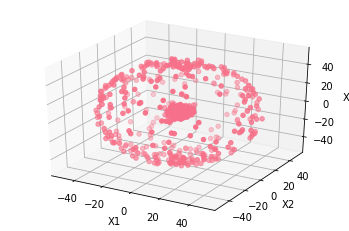

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.cluster import KMeans
kplot=plt.axes(projection='3d')                                                                                                                                    
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())                                      
kplot.scatter3D(df5.X1,df5.X2,df5.X3,label = 'Original Clusters for the data points' ,marker='o',cmap=cmap,c=df5.Class)    
plt.xlabel('X1')
plt.ylabel('X2')
kplot.set_zlabel('X3')

3D graph for data points according to K means predicted class

Text(0.5, 0, 'X3')

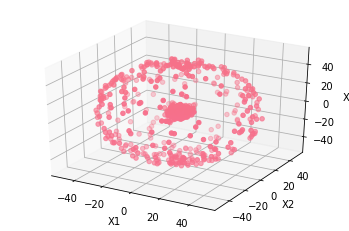

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.cluster import KMeans
kplot=plt.axes(projection='3d')
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())                                   
kplot.scatter3D(df5.X1,df5.X2,df5.X3,label = 'Kmeans Predicted Clusters for the data points',marker='o',cmap=cmap,c=df5.kcluster)    
plt.xlabel('X1')
plt.ylabel('X2')
kplot.set_zlabel('X3')

3D graph for data points according to Hierarchial predicted class

Text(0.5, 0, 'X3')

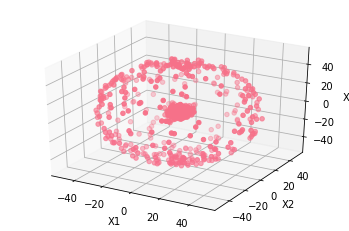

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.cluster import KMeans
kplot=plt.axes(projection='3d')
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())                                   
kplot.scatter3D(df5.X1,df5.X2,df5.X3,label = 'Hierarchial Predicted Clusters for the data points',marker='o',cmap=cmap,c=df5.hcluster)    
plt.xlabel('X1')
plt.ylabel('X2')
kplot.set_zlabel('X3')

## Data 6

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data6.csv to Data6.csv


In [ ]:
import pandas as pd
data6 = pd.read_csv('Data6.csv')
df6 = data6.drop(['Unnamed: 0'],axis=1)
df6

,X1,X2,Class
0,1.388261,2.076096,1
1,2.177247,3.102304,1
2,0.378645,5.307610,1
3,3.681732,1.622681,1
4,2.462861,2.777897,1
...,...,...,...
4091,0.909687,0.375763,2
4092,2.698381,0.511262,2
4093,1.078797,1.526153,2
4094,1.974889,-0.649343,2


In [ ]:
from scipy.spatial.distance import pdist
hist = pdist(df6.iloc[:,0:3])
#hist
hist.shape

(8386560,)

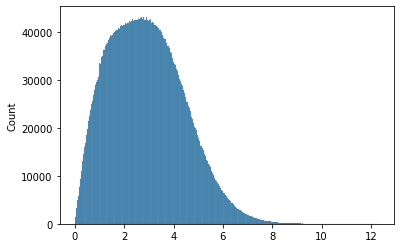

In [ ]:
import seaborn as sns
sns.histplot(hist) 

K means

In [ ]:
#evaluating within the cluster
from sklearn.cluster import KMeans
d6kmeans = KMeans(n_clusters=2)
d6kmeans.fit(df6.iloc[:,0:3])
pred = d6kmeans.predict(df6.iloc[:,0:3])
pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

Hierarchial Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_clusterd6 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hierarchical_labels = hierarchical_clusterd6.fit_predict(df6)
hierarchical_labels

array([0, 0, 0, ..., 1, 1, 1])

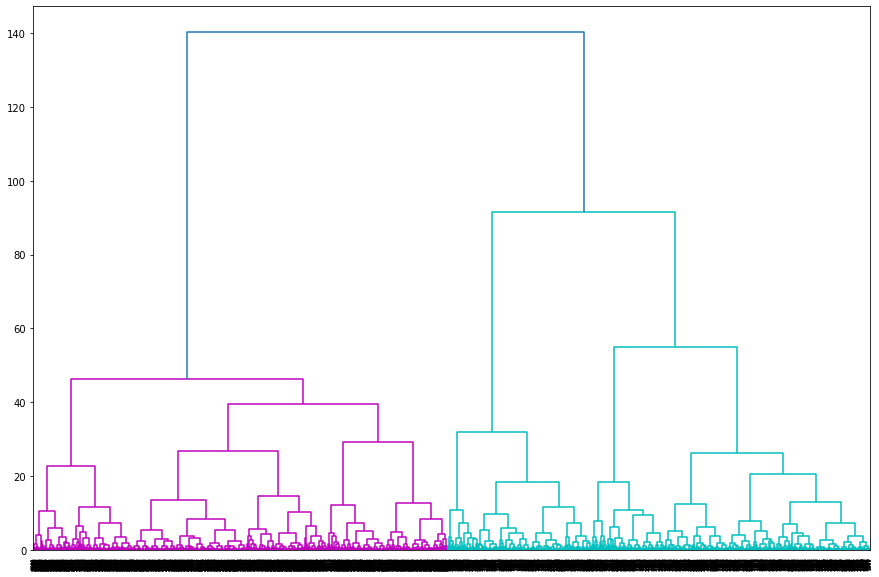

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy

plt.figure(figsize=(15,10))

linkage_data = linkage(df6, method='ward', metric='euclidean')
dendrogram(linkage_data)
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
plt.show()

In [ ]:
#creating new columns of predicited values using kmeans and hierarchial
df6['kcluster'] = pred                        
df6['kcluster'] = df6['kcluster'] +1
df6['hcluster'] = hierarchical_labels                       
df6['hcluster'] = df6['hcluster'] +1    
df6


,X1,X2,Class,kcluster,hcluster
0,1.388261,2.076096,1,1,1
1,2.177247,3.102304,1,1,1
2,0.378645,5.307610,1,1,1
3,3.681732,1.622681,1,1,1
4,2.462861,2.777897,1,1,1
...,...,...,...,...,...
4091,0.909687,0.375763,2,2,2
4092,2.698381,0.511262,2,2,2
4093,1.078797,1.526153,2,2,2
4094,1.974889,-0.649343,2,2,2


In [ ]:
#grouping according to the given and predicted values
df_kmeans = df6.groupby(['Class','kcluster'],as_index=False)['X1'].count().rename(columns={'X1':'counts'})  
df_hier = df6.groupby(['Class','hcluster'],as_index=False)['X1'].count().rename(columns={'X1':'counts'})  

In [ ]:
df_kmeans

,Class,kcluster,counts
0,1,1,2024
1,1,2,24
2,2,1,114
3,2,2,1934


In [ ]:
df_hier

,Class,hcluster,counts
0,1,1,2046
1,1,2,2
2,2,1,19
3,2,2,2029


Contingency table

In [ ]:
TP_K,FP_K,FN_K,TN_K=0,0,0,0                              
for i in df_kmeans['Class'].unique(): 
  tmp = df_kmeans[df_kmeans.Class==i]
  tmp1 = tmp.sort_values(by=['counts'],ascending=[False])
  T, P = tmp1.iloc[0,0], tmp1.iloc[0,1]      
  TP_K = TP_K+df_kmeans[(df_kmeans.Class==T) & (df_kmeans.kcluster==P)].iloc[0,2] if df_kmeans[(df_kmeans.Class==T) & (df_kmeans.kcluster==P)].shape[0]!=0 else TP_K+0
  FP_K = FP_K+df_kmeans[(df_kmeans.Class==T) & (df_kmeans.kcluster!=P)].iloc[0,2] if df_kmeans[(df_kmeans.Class==T) & (df_kmeans.kcluster!=P)].shape[0]!=0 else FP_K+0
  FN_K = FN_K+df_kmeans[(df_kmeans.Class!=T) & (df_kmeans.kcluster==P)].iloc[0,2] if df_kmeans[(df_kmeans.Class!=T) & (df_kmeans.kcluster==P)].shape[0]!=0 else FN_K+0
  TN_K = TN_K+df_kmeans[(df_kmeans.Class!=T) & (df_kmeans.kcluster!=P)].iloc[0,2] if df_kmeans[(df_kmeans.Class!=T) & (df_kmeans.kcluster!=P)].shape[0]!=0 else TN_K+0         

In [ ]:
TP_H,FP_H,FN_H,TN_H=0,0,0,0                              
for i in df_hier['Class'].unique():                
  tmp = df_hier[df_hier.Class==i]                    
  tmp1 = tmp.sort_values(by=['counts'],ascending=[False])      
  T, P = tmp1.iloc[0,0], tmp1.iloc[0,1]                         
  TP_H = TP_H+df_hier[(df_hier.Class==T) & (df_hier.hcluster==P)].iloc[0,2] if df_hier[(df_hier.Class==T) & (df_hier.hcluster==P)].shape[0]!=0 else TP_H+0
  FP_H = FP_H+df_hier[(df_hier.Class==T) & (df_hier.hcluster!=P)].iloc[0,2] if df_hier[(df_hier.Class==T) & (df_hier.hcluster!=P)].shape[0]!=0 else FP_H+0
  FN_H = FN_H+df_hier[(df_hier.Class!=T) & (df_hier.hcluster==P)].iloc[0,2] if df_hier[(df_hier.Class!=T) & (df_hier.hcluster==P)].shape[0]!=0 else FN_H+0
  TN_H = TN_H+df_hier[(df_hier.Class!=T) & (df_hier.hcluster!=P)].iloc[0,2] if df_hier[(df_hier.Class!=T) & (df_hier.hcluster!=P)].shape[0]!=0 else TN_H+0

In [ ]:
print("Accuracy Score using Kmeans = " ,(TP_K+TN_K)/(TP_K+FP_K+FN_K+TN_K))

Accuracy Score using Kmeans =  0.96630859375


In [ ]:
Precision_K = TP_K/(TP_K+FP_K)  
Recall_K = TP_K/(TP_K+FN_K) 
F1_Kmeans = 2 * (Precision_K * Recall_K) / (Precision_K + Recall_K)
print("Precision using Kmeans = " ,Precision_K)
print("Recall using Kmeans = " ,Recall_K)
print("F1 Score using Kmeans = " ,F1_Kmeans)     

Precision using Kmeans =  0.96630859375
Recall using Kmeans =  0.96630859375
F1 Score using Kmeans =  0.96630859375


In [ ]:
print("Accuracy Score using Hierarchial = " ,(TP_H+TN_H)/(TP_H+FP_H+FN_H+TN_H))

Accuracy Score using Hierarchial =  0.994873046875


In [ ]:
Precision_H = TP_H/(TP_H+FP_H)  
Recall_H = TP_H/(TP_H+FN_H)
F1_Hier = 2 * (Precision_H * Recall_H) / (Precision_H + Recall_H) 
print("Precision using Kmeans = " ,Precision_K)
print("Recall using Kmeans = " ,Recall_K)
print("F1 Score using Hierarchial = " ,F1_Hier)

Precision using Kmeans =  0.96630859375
Recall using Kmeans =  0.96630859375
F1 Score using Hierarchial =  0.994873046875


Though the accuracy score is high, we cannot be confident with it as mapping classes could be false because they are done based on random mapping. This model therefore cannot be considered.

3D graph for data points according to original class

Text(0.5, 0, 'X2')

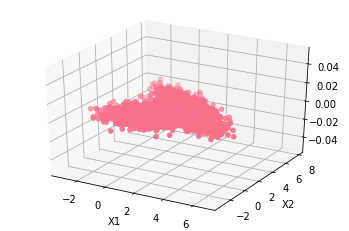

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.cluster import KMeans
kplot=plt.axes(projection='3d')                                                                                                                                    
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())                                      
kplot.scatter3D(df6.X1,df6.X2, label = 'Original Clusters for the data points' ,marker='o',cmap=cmap,c=df6.Class)    
plt.xlabel('X1')
plt.ylabel('X2')

3D graph for data points according to k means class

Text(0.5, 0, 'X2')

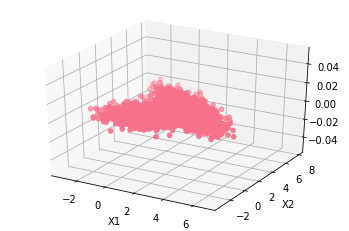

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.cluster import KMeans
kplot=plt.axes(projection='3d')
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())                                   
kplot.scatter3D(df6.X1,df6.X2,label = 'Kmeans Predicted Clusters for the data points',marker='o',cmap=cmap,c=df6.kcluster)    
plt.xlabel('X1')
plt.ylabel('X2')

3D graph for data points according to Hierarchial predicted class

Text(0.5, 0, 'X2')

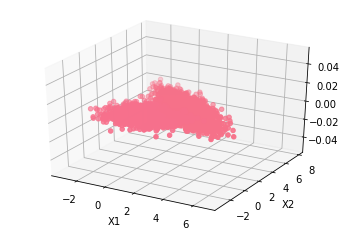

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.cluster import KMeans
kplot=plt.axes(projection='3d')
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())                                   
kplot.scatter3D(df6.X1,df6.X2,label = 'Hierarchial Predicted Clusters for the data points',marker='o',cmap=cmap,c=df6.hcluster)    
plt.xlabel('X1')
plt.ylabel('X2')

## Data 7

In [ ]:
# Data 7
df7 = pd.read_csv('Data7.csv')
df7 = df7.drop(columns='Unnamed: 0', index = 1)

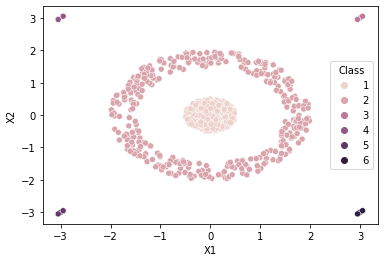

In [ ]:
# Visualizing the raw data
sns.scatterplot(data=df7, x= 'X1', y= 'X2', hue = 'Class')

In [ ]:
# Using KMeans 
km = KMeans(n_clusters=6, max_iter=100, random_state= 0)
km.fit(df7.iloc[:,:1])
y_pred = (km.labels_)+1
df7['Prediction_KM'] = y_pred
print("Accuracy score for KMeans: ", accuracy_score(df7.iloc[:,2].values,y_pred))
print("F1 score for KMeans: ", f1_score(df7.iloc[:,2].values,y_pred, average = 'macro'))

Accuracy score for KMeans:  0.3511053315994798
F1 score for KMeans:  0.15853845012723516


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


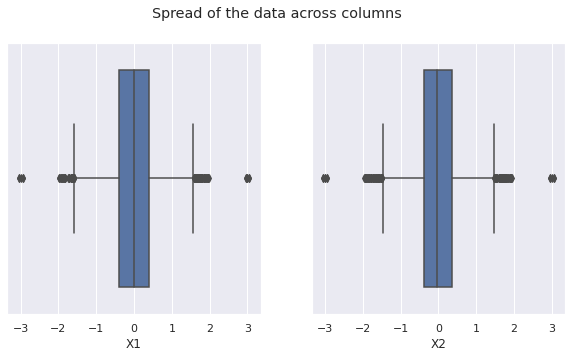

In [ ]:
# To understand the spread of data accross the columns 
sns.set()
fig, axes = plt.subplots(1,2, sharex=True, figsize=(10,5))
fig.suptitle('Spread of the data across columns')
sns.boxplot(df7['X1'], ax = axes[0])
sns.boxplot(df7['X2'], ax = axes[1])

In [ ]:
# Removing the outliers in the data
values = [1,2]
df7_modified = df7.loc[(df7['Class'] == 1) | (df7['Class'] == 2)]
df7_modified = df7_modified.copy()

In [ ]:
# Fitting the modified data to KMeans
km = KMeans(n_clusters=2, max_iter=100, random_state= 0)
km.fit(df7_modified.iloc[:,:1])
y_pred = (km.labels_)+1
df7_modified['Prediction_modKM'] = y_pred
print("Accuracy score for modified data using KMeans: ", accuracy_score(df7_modified.iloc[:,2].values,y_pred))
print("F1 score for modified data using KMeans: ", f1_score(df7_modified.iloc[:,2].values,y_pred, average = 'macro'))

Accuracy score for modified data using KMeans:  0.2783641160949868
F1 score for modified data using KMeans:  0.21775025799793604


In [ ]:
# Mapping the labels 
dic = {1:2, 2:1}
y_pred = np.vectorize(dic.__getitem__)(y_pred)
print("Accuracy score for KMeans: ", accuracy_score(df7_modified.iloc[:,2].values,y_pred))
print("F1 score for KMeans: ", f1_score(df7_modified.iloc[:,2].values,y_pred, average = 'macro'))

Accuracy score for KMeans:  0.7216358839050132
F1 score for KMeans:  0.6897510256733558


Since Kmeans clustering algorithm clusters the data and labels them accordigly. This order of labeling maynot be similar to the class labels of the raw data.
So the accuracy reported is not appropriate

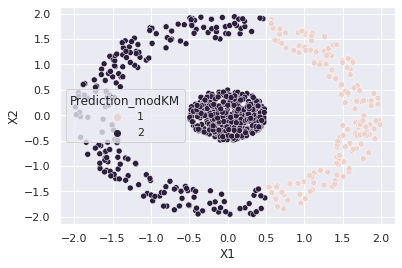

In [ ]:
# Visualizing the plot according to KMeans algorithm prediction
sns.scatterplot(data=df7_modified, x= 'X1', y= 'X2', hue = 'Prediction_modKM')

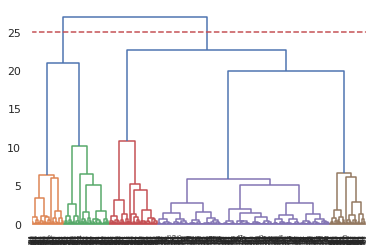

<Figure size 1800x720 with 0 Axes>

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_data = linkage(df7.iloc[:,:2], method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.axhline(y = 25, color = 'r', linestyle = '--')
fig = plt.figure(figsize=(25, 10))
plt.show()

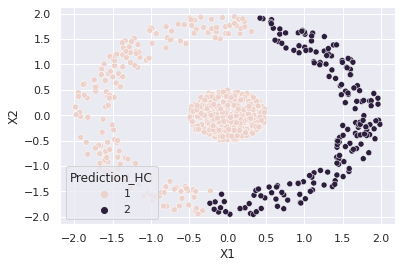

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(df7_modified.iloc[:,:2])
y_pred_hc = labels+1
df7_modified['Prediction_HC'] = y_pred_hc
sns.scatterplot(data=df7_modified, x= 'X1', y= 'X2', hue = 'Prediction_HC')

In [ ]:
print("Accuracy Score using Hierarchical clustering ", accuracy_score(df7_modified.iloc[:,2].values,y_pred_hc))
print("F1score for Hierarchical Clustering: ", f1_score(df7_modified.iloc[:,2].values,y_pred_hc, average = 'macro'))

Accuracy Score using Hierarchical clustering  0.7519788918205804
F1score for Hierarchical Clustering:  0.729164290981519


## Data 8

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data8.csv to Data8.csv


In [ ]:
import pandas as pd
data8 = pd.read_csv('Data8.csv')
df8= data8.drop(['Unnamed: 0'],axis=1)
df8

,X1,X2,X3,Class
0,0.000000,0.000000,1.00000,1
1,0.000000,0.052336,0.99863,1
2,0.049774,0.016173,0.99863,1
3,0.030762,-0.042341,0.99863,1
4,-0.030762,-0.042341,0.99863,1
...,...,...,...,...
3997,0.049774,-0.016173,-0.99863,1
3998,0.000000,-0.052336,-0.99863,1
3999,-0.049774,-0.016173,-0.99863,1
4000,-0.030762,0.042341,-0.99863,1


In [ ]:
from scipy.spatial.distance import pdist
hist = pdist(df8.iloc[:,0:3])
#hist
hist.shape

(8006001,)

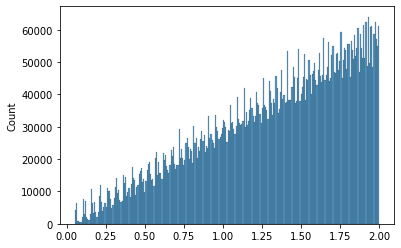

In [ ]:
import seaborn as sns
sns.histplot(hist) 

K means

In [ ]:
#evaluating within the cluster
from sklearn.cluster import KMeans
d8kmeans = KMeans(n_clusters=1)
d8kmeans.fit(df8.iloc[:,0:3])
pred = d8kmeans.predict(df8.iloc[:,0:3])
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

Hierarchial clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_clusterd8 = AgglomerativeClustering(n_clusters=1, affinity='euclidean', linkage='ward')
hierarchical_labels = hierarchical_clusterd8.fit_predict(df8)
hierarchical_labels


array([0, 0, 0, ..., 0, 0, 0])

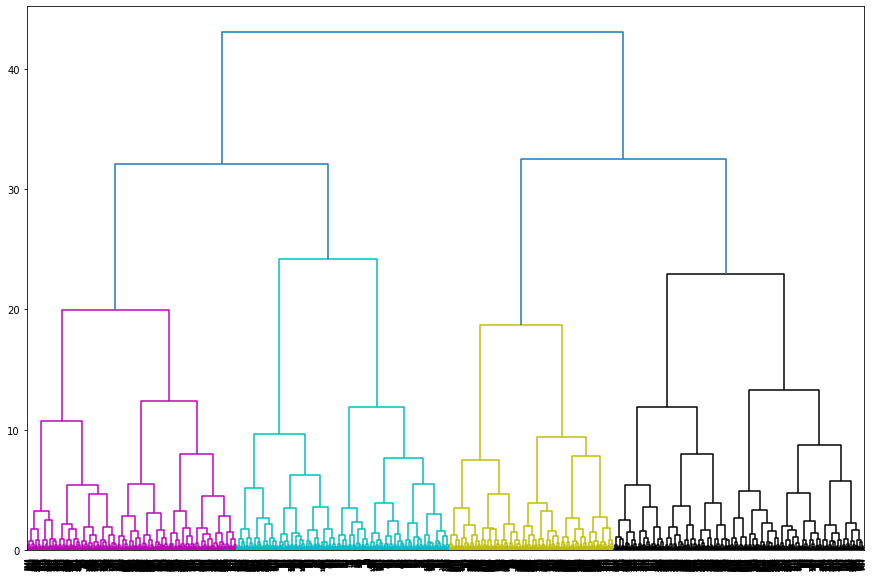

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy

plt.figure(figsize=(15,10))

linkage_data = linkage(df8, method='ward', metric='euclidean')
dendrogram(linkage_data)
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
plt.show()

In [ ]:
#creating new columns of predicited values using kmeans and hierarchial
df8['kcluster'] = pred                        
df8['kcluster'] = df8['kcluster'] +1
df8['hcluster'] = hierarchical_labels                       
df8['hcluster'] = df8['hcluster'] +1    
df8

,X1,X2,X3,Class,kcluster,hcluster
0,0.000000,0.000000,1.00000,1,1,1
1,0.000000,0.052336,0.99863,1,1,1
2,0.049774,0.016173,0.99863,1,1,1
3,0.030762,-0.042341,0.99863,1,1,1
4,-0.030762,-0.042341,0.99863,1,1,1
...,...,...,...,...,...,...
3997,0.049774,-0.016173,-0.99863,1,1,1
3998,0.000000,-0.052336,-0.99863,1,1,1
3999,-0.049774,-0.016173,-0.99863,1,1,1
4000,-0.030762,0.042341,-0.99863,1,1,1


In [ ]:
#grouping according to the given and predicted values
df_kmeans = df8.groupby(['Class','kcluster'],as_index=False)['X1'].count().rename(columns={'X1':'counts'})  
df_hier = df8.groupby(['Class','hcluster'],as_index=False)['X1'].count().rename(columns={'X1':'counts'}) 

In [ ]:
df_kmeans

,Class,kcluster,counts
0,1,1,4002


In [ ]:
df_hier

,Class,hcluster,counts
0,1,1,4002


Contingency table

In [ ]:
TP_K,FP_K,FN_K,TN_K=0,0,0,0                              
for i in df_kmeans['Class'].unique(): 
  tmp = df_kmeans[df_kmeans.Class==i]
  tmp1 = tmp.sort_values(by=['counts'],ascending=[False])
  T, P = tmp1.iloc[0,0], tmp1.iloc[0,1]      
  TP_K = TP_K+df_kmeans[(df_kmeans.Class==T) & (df_kmeans.kcluster==P)].iloc[0,2] if df_kmeans[(df_kmeans.Class==T) & (df_kmeans.kcluster==P)].shape[0]!=0 else TP_K+0
  FP_K = FP_K+df_kmeans[(df_kmeans.Class==T) & (df_kmeans.kcluster!=P)].iloc[0,2] if df_kmeans[(df_kmeans.Class==T) & (df_kmeans.kcluster!=P)].shape[0]!=0 else FP_K+0
  FN_K = FN_K+df_kmeans[(df_kmeans.Class!=T) & (df_kmeans.kcluster==P)].iloc[0,2] if df_kmeans[(df_kmeans.Class!=T) & (df_kmeans.kcluster==P)].shape[0]!=0 else FN_K+0
  TN_K = TN_K+df_kmeans[(df_kmeans.Class!=T) & (df_kmeans.kcluster!=P)].iloc[0,2] if df_kmeans[(df_kmeans.Class!=T) & (df_kmeans.kcluster!=P)].shape[0]!=0 else TN_K+0   

In [ ]:
TP_H,FP_H,FN_H,TN_H=0,0,0,0                              
for i in df_hier['Class'].unique():                
  tmp = df_hier[df_hier.Class==i]                    
  tmp1 = tmp.sort_values(by=['counts'],ascending=[False])      
  T, P = tmp1.iloc[0,0], tmp1.iloc[0,1]                         
  TP_H = TP_H+df_hier[(df_hier.Class==T) & (df_hier.hcluster==P)].iloc[0,2] if df_hier[(df_hier.Class==T) & (df_hier.hcluster==P)].shape[0]!=0 else TP_H+0
  FP_H = FP_H+df_hier[(df_hier.Class==T) & (df_hier.hcluster!=P)].iloc[0,2] if df_hier[(df_hier.Class==T) & (df_hier.hcluster!=P)].shape[0]!=0 else FP_H+0
  FN_H = FN_H+df_hier[(df_hier.Class!=T) & (df_hier.hcluster==P)].iloc[0,2] if df_hier[(df_hier.Class!=T) & (df_hier.hcluster==P)].shape[0]!=0 else FN_H+0
  TN_H = TN_H+df_hier[(df_hier.Class!=T) & (df_hier.hcluster!=P)].iloc[0,2] if df_hier[(df_hier.Class!=T) & (df_hier.hcluster!=P)].shape[0]!=0 else TN_H+0


In [ ]:
print("Accuracy Score using Kmeans = " ,(TP_K+TN_K)/(TP_K+FP_K+FN_K+TN_K))

Accuracy Score using Kmeans =  1.0


Though the accuracy score is high, we cannot be confident with it as mapping classes could be false because they are done based on random mapping. This model therefore cannot be considered.

In [ ]:
Precision_K = TP_K/(TP_K+FP_K)  
Recall_K = TP_K/(TP_K+FN_K) 
F1_Kmeans = 2 * (Precision_K * Recall_K) / (Precision_K + Recall_K)
print("Precision using Kmeans = " ,Precision_K)
print("Recall using Kmeans = " ,Recall_K)
print("F1 Score using Kmeans = " ,F1_Kmeans)  

Precision using Kmeans =  1.0
Recall using Kmeans =  1.0
F1 Score using Kmeans =  1.0


In [ ]:
print("Accuracy Score using Hierarchial = " ,(TP_H+TN_H)/(TP_H+FP_H+FN_H+TN_H))

Accuracy Score using Hierarchial =  1.0


In [ ]:
Precision_H = TP_H/(TP_H+FP_H)  
Recall_H = TP_H/(TP_H+FN_H)
F1_Hier = 2 * (Precision_H * Recall_H) / (Precision_H + Recall_H) 
print("Precision using Kmeans = " ,Precision_K)
print("Recall using Kmeans = " ,Recall_K)
print("F1 Score using Hierarchial = " ,F1_Hier)

Precision using Kmeans =  1.0
Recall using Kmeans =  1.0
F1 Score using Hierarchial =  1.0


3D graph for data points according to original class

Text(0.5, 0, 'X3')

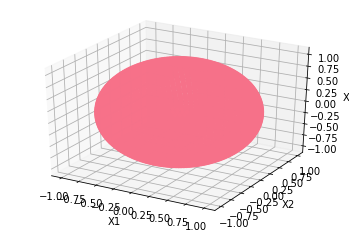

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.cluster import KMeans
kplot=plt.axes(projection='3d')                                                                                                                                    
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())                                      
kplot.scatter3D(df8.X1,df8.X2,df8.X3,label = 'Original Clusters for the data points' ,marker='o',cmap=cmap,c=df8.Class)    
plt.xlabel('X1')
plt.ylabel('X2')
kplot.set_zlabel('X3')

3D graph for data points according to k means class

Text(0.5, 0, 'X3')

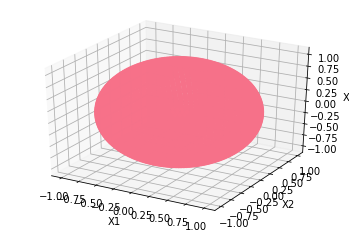

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.cluster import KMeans
kplot=plt.axes(projection='3d')
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())                                   
kplot.scatter3D(df8.X1,df8.X2,df8.X3,label = 'Kmeans Predicted Clusters for the data points',marker='o',cmap=cmap,c=df8.kcluster)    
plt.xlabel('X1')
plt.ylabel('X2')
kplot.set_zlabel('X3')

3D graph for data points according to hierarchial prediction class

Text(0.5, 0, 'X3')

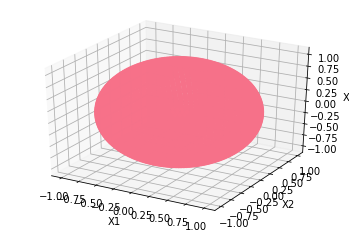

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.cluster import KMeans
kplot=plt.axes(projection='3d')
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())                                   
kplot.scatter3D(df8.X1,df8.X2,df8.X3,label = 'Hierarchial Predicted Clusters for the data points',marker='o',cmap=cmap,c=df8.hcluster)    
plt.xlabel('X1')
plt.ylabel('X2')
kplot.set_zlabel('X3')